In [2]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [77]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [79]:
pip show kaleido

Name: kaleido
Version: 0.2.1
Summary: Static image export for web-based visualization libraries with zero dependencies
Home-page: UNKNOWN
Author: Jon Mease
Author-email: jon@plotly.com
License: MIT
Location: c:\Users\User\anaconda3\Lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Module used to connect python to MongoDB

from pymongo import MongoClient

# Other modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [4]:
# Default port used by MongoDB is 27017

mongo= MongoClient(port=27017)

# Creating the database and collection

db = mongo['world_energy']
collection = db["energy_consumption"]

In [5]:
# Loading the .csv file using pandas

df = pd.read_csv("Resources/World Energy Consumption.csv")
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [6]:
# Insert the data into MongoDB
collection.insert_many(df.to_dict('records'))

print("Data inserted into MongoDB.")

Data inserted into MongoDB.


In [7]:
# List of countries to filter
countries = ['Asia', 'Austria', 'Australia','Brazil', 'Canada', 'China', 'Croatia', 'Algeria', 'Argentina','Europe',
              'France', 'Germany', 'India', 'Italy', 'Japan', 'Netherlands', 'North America', 'Russia',
              'South Africa', 'South America', 'South Korea', 'Spain', 'Turkey', 'Ukraine', 
              'United Arab Emirates','United Kingdom', 'United States', 'Vietnam']

# Query MongoDB to find documents where 'country' is in the list
results = collection.find({'country': {'$in': countries}})

# Convert the results to a list
results_list = list(results)

# Check the number of documents found
print(f"Found {len(results_list)} documents for the specified countries.")


Found 23634 documents for the specified countries.


In [8]:
# Storing in a separate MOngoDB collection

for country in countries:
    # Filter results for each country
    country_data = [doc for doc in results_list if doc.get('country') == country]
    
    # Remove the '_id' field from each document to avoid duplicate key errors
    for doc in country_data:
        if '_id' in doc:
            del doc['_id']
    
    # Create a new collection for each country
    country_collection = db[f'{country}_data']
    
    # Insert the data into the new collection
    if country_data:
        country_collection.insert_many(country_data)
        print(f"Inserted {len(country_data)} documents for {country}.")
    else:
        print(f"No data found for {country}.")



Inserted 861 documents for Asia.
Inserted 861 documents for Austria.
Inserted 861 documents for Australia.
Inserted 897 documents for Brazil.
Inserted 975 documents for Canada.
Inserted 861 documents for China.
Inserted 231 documents for Croatia.
Inserted 861 documents for Algeria.
Inserted 897 documents for Argentina.
Inserted 861 documents for Europe.
Inserted 897 documents for France.
Inserted 957 documents for Germany.
Inserted 861 documents for India.
Inserted 861 documents for Italy.
Inserted 915 documents for Japan.
Inserted 861 documents for Netherlands.
Inserted 861 documents for North America.
Inserted 278 documents for Russia.
Inserted 939 documents for South Africa.
Inserted 861 documents for South America.
Inserted 861 documents for South Korea.
Inserted 957 documents for Spain.
Inserted 861 documents for Turkey.
Inserted 844 documents for Ukraine.
Inserted 861 documents for United Arab Emirates.
Inserted 957 documents for United Kingdom.
Inserted 975 documents for United 

In [9]:
# Convert the results to a pandas DataFrame
df_filtered = pd.DataFrame(results_list)

# Save the DataFrame to a CSV file
df_filtered.to_csv('Resources/filtered_countries_data.csv', index=False)

print("Data exported to 'filtered_countries_data.csv'.")


Data exported to 'filtered_countries_data.csv'.


In [10]:
# Reading the .csv file

filtered_df = pd.read_csv('Resources/filtered_countries_data.csv')
filtered_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,_id
0,Algeria,1900,DZA,4721802.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,671566f096c0d83c25b5dd0f
1,Algeria,1901,DZA,4787149.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,671566f096c0d83c25b5dd10
2,Algeria,1902,DZA,4859600.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,671566f096c0d83c25b5dd11
3,Algeria,1903,DZA,4939332.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,671566f096c0d83c25b5dd12
4,Algeria,1904,DZA,5020372.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,671566f096c0d83c25b5dd13


In [11]:
# Dropping null values from the dataframe

filtered_df = df.dropna()
filtered_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359700e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274050e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473050e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259810e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160


In [12]:
# Removing any duplicate values

final_df = filtered_df.drop_duplicates()
final_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359700e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274050e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473050e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259810e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160


In [13]:
# Retaining only required columns related to hydro, nuclear and solar

columns_to_drop=['biofuel_cons_change_pct','biofuel_cons_change_twh','biofuel_cons_per_capita','biofuel_consumption','biofuel_elec_per_capita','biofuel_electricity','biofuel_share_elec','biofuel_share_energy',
                 'carbon_intensity_elec','coal_cons_change_pct','coal_cons_change_twh','coal_cons_per_capita','coal_consumption','coal_elec_per_capita','coal_electricity','coal_prod_change_pct',
                 'coal_prod_change_twh','coal_prod_per_capita','coal_production','coal_share_elec','coal_share_energy','electricity_demand','electricity_generation','electricity_share_energy',
                 'energy_cons_change_pct','energy_cons_change_twh','energy_per_capita','energy_per_gdp','fossil_cons_change_pct','fossil_cons_change_twh','fossil_elec_per_capita','fossil_electricity',
                 'fossil_energy_per_capita','fossil_fuel_consumption','fossil_share_elec','fossil_share_energy','gas_cons_change_pct','gas_cons_change_twh','gas_consumption','gas_elec_per_capita',
                 'gas_electricity','gas_energy_per_capita','gas_prod_change_pct','gas_prod_change_twh','gas_prod_per_capita','gas_production','gas_share_elec','gas_share_energy','greenhouse_gas_emissions',
                 'low_carbon_cons_change_pct','low_carbon_cons_change_twh','low_carbon_consumption','low_carbon_elec_per_capita','low_carbon_electricity','low_carbon_energy_per_capita','low_carbon_share_elec',
                 'low_carbon_share_energy','net_elec_imports','net_elec_imports_share_demand','oil_cons_change_pct','oil_cons_change_twh','oil_consumption','oil_elec_per_capita','oil_electricity',
                 'oil_energy_per_capita','oil_prod_change_pct','oil_prod_change_twh','oil_prod_per_capita','oil_production','oil_share_elec','oil_share_energy','other_renewable_consumption',
                 'other_renewable_electricity','other_renewable_exc_biofuel_electricity','other_renewables_cons_change_pct','other_renewables_cons_change_twh','other_renewables_elec_per_capita',
                 'other_renewables_elec_per_capita_exc_biofuel','other_renewables_energy_per_capita','other_renewables_share_elec','other_renewables_share_elec_exc_biofuel','other_renewables_share_energy',
                 'per_capita_electricity','primary_energy_consumption','renewables_cons_change_pct','renewables_cons_change_twh','renewables_consumption','renewables_elec_per_capita','renewables_electricity',
                 'renewables_energy_per_capita','renewables_share_elec','renewables_share_energy','wind_cons_change_pct','wind_cons_change_twh','wind_consumption','wind_elec_per_capita','wind_electricity',
                 'wind_energy_per_capita','wind_share_elec','wind_share_energy']

new_df = final_df.drop(columns= columns_to_drop)
new_df.head()

,country,year,iso_code,population,gdp,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,...,nuclear_share_elec,nuclear_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359700e+11,-6.514,-6.559,86.034,747.337,31.03,...,4.798,1.864,1779.148,0.004,0.004,0.000,0.00,0.107,0.000,0.000
1072,Argentina,2012,ARG,41952364.0,8.274050e+11,-6.485,-6.067,79.967,684.348,28.71,...,4.585,1.785,406.380,0.018,0.022,0.238,0.01,0.534,0.008,0.002
1073,Argentina,2013,ARG,42388268.0,8.473050e+11,12.368,9.349,89.316,766.957,32.51,...,4.331,1.654,84.438,0.019,0.041,0.236,0.01,0.969,0.008,0.004
1074,Argentina,2014,ARG,42824064.0,8.259810e+11,-1.082,-1.496,87.820,754.949,32.33,...,3.991,1.463,5.771,0.002,0.043,0.467,0.02,1.009,0.015,0.004
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,-0.244,-0.736,87.084,738.377,31.94,...,4.819,1.825,-7.909,-0.004,0.040,0.231,0.01,0.914,0.007,0.004


In [14]:
# Checking the columns in the new dataframe before plotting

new_df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'hydro_cons_change_pct', 'hydro_cons_change_twh', 'hydro_consumption',
       'hydro_elec_per_capita', 'hydro_electricity', 'hydro_energy_per_capita',
       'hydro_share_elec', 'hydro_share_energy', 'nuclear_cons_change_pct',
       'nuclear_cons_change_twh', 'nuclear_consumption',
       'nuclear_elec_per_capita', 'nuclear_electricity',
       'nuclear_energy_per_capita', 'nuclear_share_elec',
       'nuclear_share_energy', 'solar_cons_change_pct',
       'solar_cons_change_twh', 'solar_consumption', 'solar_elec_per_capita',
       'solar_electricity', 'solar_energy_per_capita', 'solar_share_elec',
       'solar_share_energy'],
      dtype='object')

In [15]:
# Iterate over the DataFrame rows and insert them into MongoDB
for index, row in new_df.iterrows():
    # Convert each row to a dictionary for MongoDB insertion
    collection.insert_one(row.to_dict())

print("Cleaned DataFrame inserted successfully into MongoDB!")

Cleaned DataFrame inserted successfully into MongoDB!


In [16]:
# checking the countries in the dataframe

print("Unique countries in the dataset:", new_df['country'].unique())

Unique countries in the dataset: ['Argentina' 'Brazil' 'Bulgaria' 'Canada' 'Czechia' 'France' 'Germany'
 'Hungary' 'Japan' 'Mexico' 'Romania' 'Russia' 'Slovakia' 'Slovenia'
 'South Africa' 'Spain' 'Ukraine' 'United Kingdom' 'United States']


In [17]:
# Setting the timeline

plot_df = new_df[(new_df['year'] >= 1990) & (new_df['year'] <= 2024)]

#Groupby by the top 5 countries

top_countries = plot_df.groupby('country')['hydro_consumption'].sum().nlargest(5).index
top_countries

Index(['Canada', 'United States', 'Brazil', 'Japan', 'Mexico'], dtype='object', name='country')

In [18]:
# Filter DataFrame for the top countries

top_countries_data = plot_df[plot_df['country'].isin(top_countries)]
top_countries_data

,country,year,iso_code,population,gdp,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,...,nuclear_share_elec,nuclear_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy
2966,Brazil,2013,BRA,201721776.0,3.112910e+12,-5.863,-73.225,1065.617,1938.264,390.99,...,2.600,1.163,196.796,0.009,0.013,0.000,0.00,0.065,0.000,0.000
2967,Brazil,2014,BRA,203459648.0,3.128570e+12,-4.489,-53.934,1011.683,1835.450,373.44,...,2.485,1.122,235.485,0.031,0.044,0.098,0.02,0.214,0.003,0.001
2968,Brazil,2015,BRA,205188208.0,3.270710e+12,-3.668,-42.906,968.777,1753.220,359.74,...,2.434,1.083,266.361,0.115,0.159,0.292,0.06,0.773,0.010,0.005
2969,Brazil,2016,BRA,206859584.0,2.889040e+12,5.884,50.935,1019.713,1841.394,380.91,...,2.620,1.187,44.712,0.070,0.228,0.387,0.08,1.103,0.014,0.007
2970,Brazil,2017,BRA,208504960.0,2.927000e+12,-2.626,-32.623,987.090,1778.903,370.91,...,2.557,1.161,875.613,1.985,2.214,3.981,0.83,10.617,0.143,0.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20702,United States,2014,USA,322033952.0,1.648270e+13,-4.051,-33.606,692.853,786.221,253.19,...,19.462,8.391,82.149,35.435,79.149,89.804,28.92,245.780,0.706,0.304
20703,United States,2015,USA,324607776.0,1.690260e+13,-3.635,-29.162,663.691,751.646,243.99,...,19.520,8.422,34.947,27.024,106.174,120.237,39.03,327.083,0.956,0.412
20704,United States,2016,USA,327210208.0,1.716260e+13,7.024,42.414,706.105,798.050,261.13,...,19.711,8.470,40.567,42.188,148.362,167.690,54.87,453.415,1.342,0.577
20705,United States,2017,USA,329791232.0,1.759630e+13,12.527,83.783,789.888,890.988,293.84,...,19.864,8.381,40.847,59.372,207.734,234.330,77.28,629.895,1.907,0.805


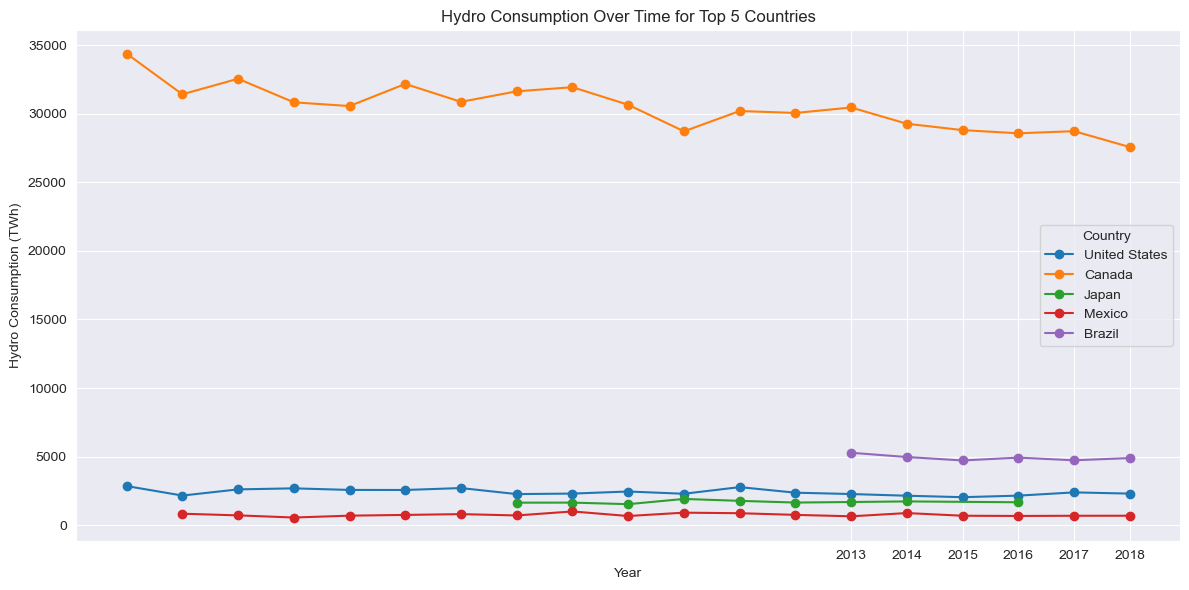

In [52]:
# Plotting the comsumption of hydro enegry

plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['hydro_energy_per_capita'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Hydro Consumption (TWh)')
plt.title('Hydro Consumption Over Time for Top 5 Countries')
plt.xticks(country_data['year'].unique())
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()

# Save the pair plot to the 'output' folder
plt.savefig('output/hydro_consumption.png')

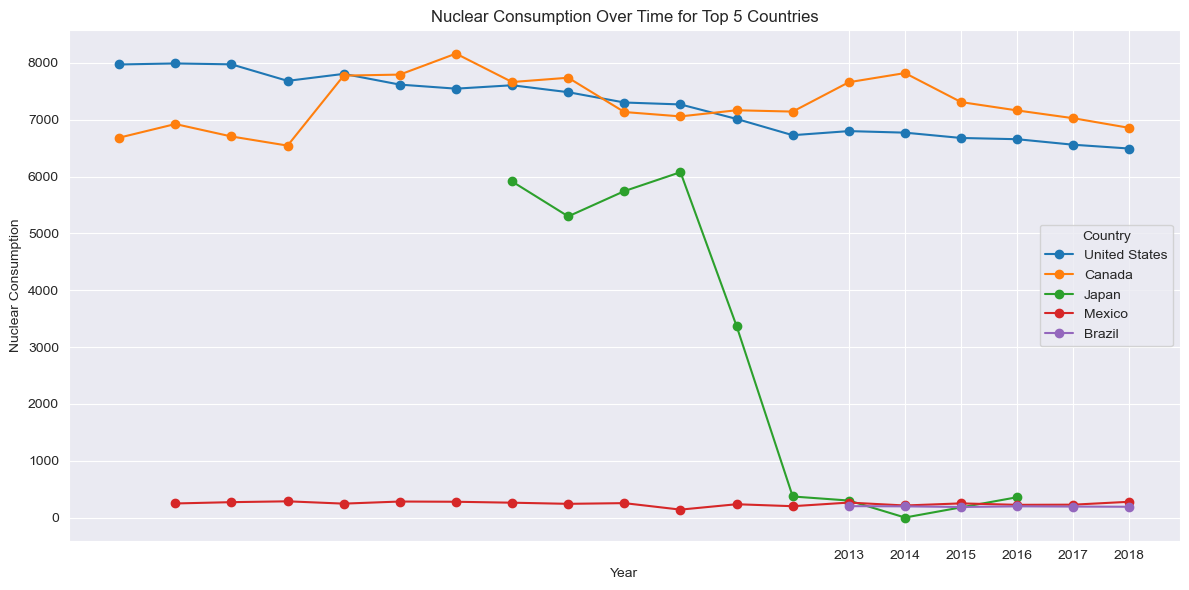

In [51]:
# Plotting the comsumption of nuclear enegry

plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['nuclear_energy_per_capita'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Nuclear Consumption')
plt.title('Nuclear Consumption Over Time for Top 5 Countries')
plt.xticks(country_data['year'].unique())
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()


# Save the pair plot to the 'output' folder
plt.savefig('output/nuclear_consumption.png')

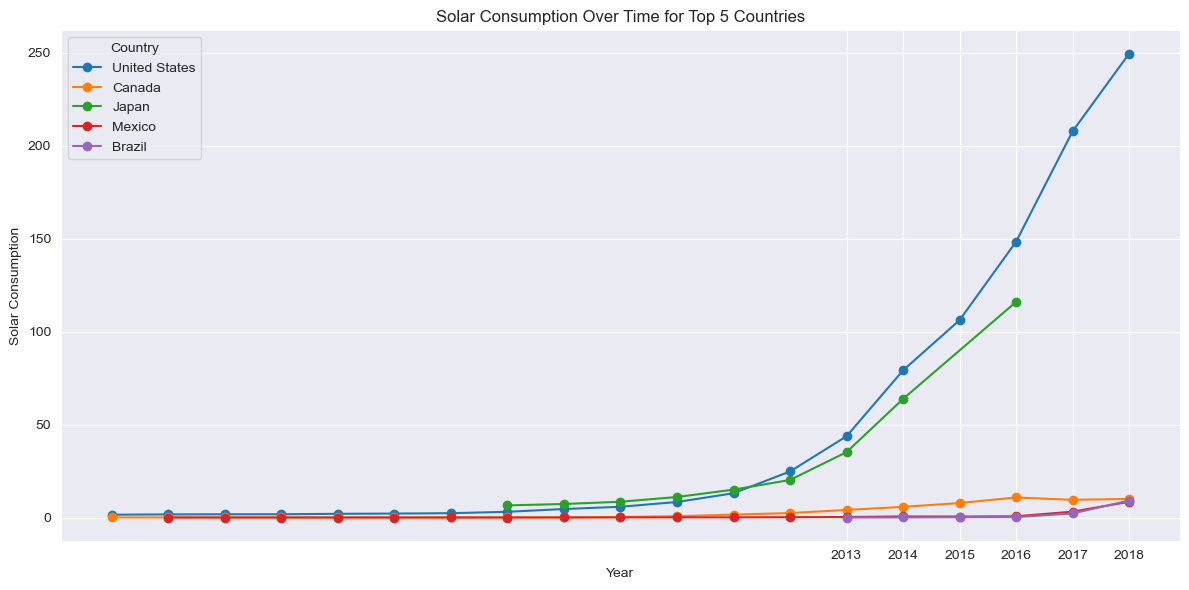

In [50]:
# Plotting the comsumption of solar enegry

plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['solar_consumption'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Solar Consumption')
plt.title('Solar Consumption Over Time for Top 5 Countries')
plt.xticks(country_data['year'].unique())
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()


# Save the pair plot to the 'output' folder
plt.savefig('output/solar_consumption.png')

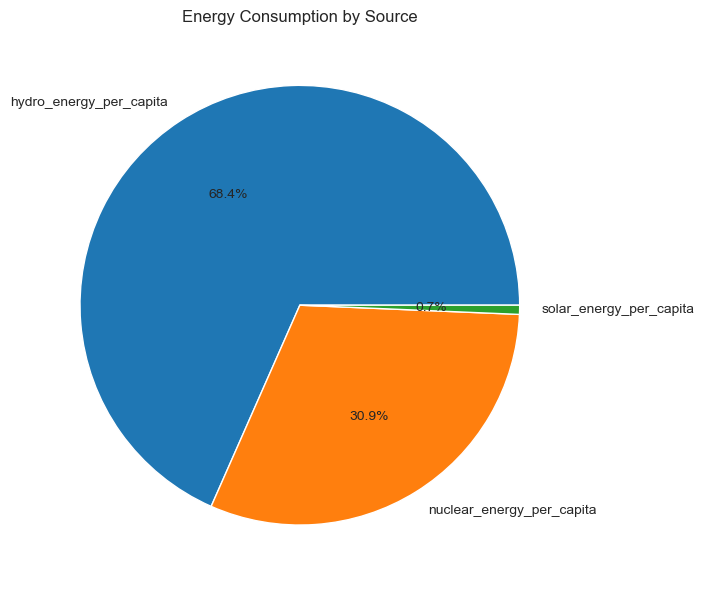

In [46]:
# Plot energy consumption breakdown by source

for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
   
fig, ax = plt.subplots(figsize=(10, 6))
source_cols = ['hydro_energy_per_capita', 'nuclear_energy_per_capita', 'solar_energy_per_capita']
top_countries_data[source_cols].sum().plot(kind='pie', ax=ax, autopct='%1.1f%%')
ax.set_title('Energy Consumption by Source')
ax.set_ylabel('')
plt.tight_layout()


# Save the pair plot to the 'output' folder
plt.savefig('output/energy_consumption_by_source.png')

In [23]:
sns.set_style("darkgrid")

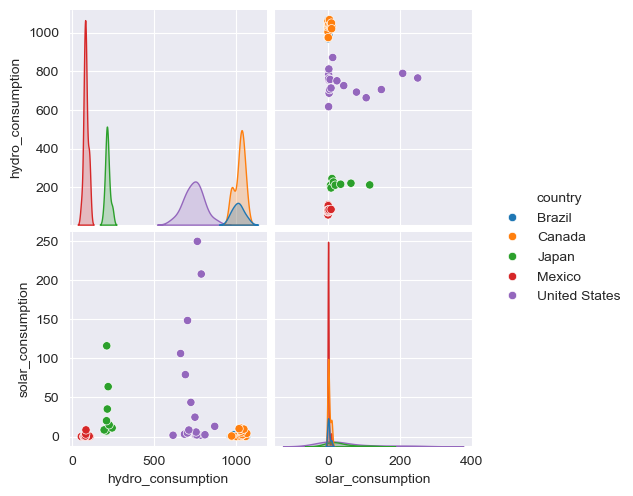

In [57]:
# Ensure the DataFrame only includes numeric columns when using mean()
numeric_columns = top_countries_data.select_dtypes(include='number')  # Select only numeric columns

# Find the top 5 countries based on mean GDP (or another metric)
top_5_countries = top_countries_data.groupby('country')[numeric_columns.columns].mean().nlargest(5, 'population').index

# Filter the data for the top 5 countries
top_5_data = top_countries_data[top_countries_data['country'].isin(top_5_countries)]

# Select the variables you want to plot
selected_variables = ['hydro_consumption', 'solar_consumption']

# Create the pair plot for the top 5 countries
sns.pairplot(top_5_data, hue='country', vars=selected_variables)

# Save the pair plot to the 'output' folder
plt.savefig('output/pairplot_top_5_countries.png') 

# Show the plot
plt.show()


In [29]:
# Filter for the last two decades (2005 to 2024)
top_5_data = top_countries_data[(top_countries_data['year'] >= 2005) & (top_countries_data['year'] <= 2024)]

# Group by country and calculate the average hydro share of electricity for each country
avg_hydro = top_5_data.groupby('country')['hydro_share_elec'].mean().reset_index()

# Sort by biofuel share of electricity and select the top N countries (e.g., top 5)
top_countries = avg_hydro.sort_values('hydro_share_elec', ascending=False).head(5)['country'].tolist()

# Filter the original DataFrame for the top N countries
df_filtered = top_5_data[top_5_data['country'].isin(top_countries)]

# Create a scatter plot for biofuel share of electricity
fig = px.scatter(df_filtered, 
                 x='year', 
                 y='hydro_share_elec', 
                 color='country', 
                 size='gdp', 
                 hover_name='country', 
                 title='Hydro Share of Electricity Over Time (Top 5 Countries)',
                 labels={'hydro_share_elec': 'Hydro Share in Electricity (%)', 'year': 'Year'})




# Show the visual
fig.show()

# Save the file
fig.write_image('Output/Hydro_Share_in_Electricity_Top_5.png')

In [45]:
# Filter for the last two decades (2005 to 2024)
top_5_data = top_countries_data[(top_countries_data['year'] >= 2005) & (top_countries_data['year'] <= 2024)]

# Group by country and calculate the average nuclear share of electricity for each country
avg_hydro = top_5_data.groupby('country')['nuclear_share_elec'].mean().reset_index()

# Sort by biofuel share of electricity and select the top N countries (e.g., top 5)
top_countries = avg_hydro.sort_values('nuclear_share_elec', ascending=False).head(5)['country'].tolist()

# Filter the original DataFrame for the top N countries
df_filtered = top_5_data[top_5_data['country'].isin(top_countries)]

# Create a scatter plot for biofuel share of electricity
fig = px.scatter(df_filtered, 
                 x='year', 
                 y='nuclear_share_elec', 
                 color='country', 
                 size='gdp', 
                 hover_name='country', 
                 title='Nuclear Share of Electricity Over Time (Top 5 Countries)',
                 labels={'nuclear_share_elec': 'Nuclear Share in Electricity (%)', 'year': 'Year'})


# Save the file
fig.write_image('Output/Nuclear_Share_in_Electricity_Top_5.png')

# Show the visual
fig.show()

In [27]:
# Filter for the last two decades (2005 to 2024)
top_5_data = top_countries_data[(top_countries_data['year'] >= 2005) & (top_countries_data['year'] <= 2024)]

# Group by country and calculate the average solar share of electricity for each country
avg_hydro = top_5_data.groupby('country')['solar_share_elec'].mean().reset_index()

# Sort by biofuel share of electricity and select the top N countries (e.g., top 5)
top_countries = avg_hydro.sort_values('solar_share_elec', ascending=False).head(7)['country'].tolist()

# Filter the original DataFrame for the top N countries
df_filtered = top_5_data[top_5_data['country'].isin(top_countries)]

# Create a scatter plot for biofuel share of electricity
fig = px.scatter(df_filtered, 
                 x='year', 
                 y='solar_share_elec', 
                 color='country', 
                 size='gdp', 
                 hover_name='country', 
                 title='Solar Share of Electricity Over Time (Top 5 Countries)',
                 labels={'solar_share_elec': 'Solar Share in Electricity (%)', 'year': 'Year'})




# Show the visual
fig.show()

# Save the file
fig.write_image('Output/Solar_Share_in_Electricity_Top_5.png')